In [19]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
import matplotlib
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop


# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [ ]:
# #read in one image as target (or y)
# y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
# #show image from array
# Image.fromarray(y)

In [ ]:
#y.shape

In [ ]:
#2. create lines on target image

# X = np.array(y)
# #[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
# X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
# #show new image from array
# Image.fromarray(X)


In [2]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0003.jpg'))

In [4]:
# fig, axs = matplotlib.pyplot.subplots(1,2, figsize = (10,10))
# [ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [5]:
#reshape to fit into model
# X = X.reshape(*X.shape,1)
# X.shape

# Bring in entire data set

In [12]:
#y
y_list = []
for image in sorted(os.listdir('Data/y_variables/Unruled')):
    file='Data/y_variables/Unruled/'+ str(image)
    y_image = np.array(Image.open(file))
    y_image = y_image.reshape(*y_image.shape,1)
    y_list.append(y_image)
                  
y = np.array(y_list)  
y.shape

(669, 500, 400, 1)

In [13]:
#X

X_list = []
for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
    file = 'Data/X_variables/computer_generated_lines/'+str(image)
    X_image = np.array(Image.open(file))
    X_image = X_image.reshape(*X_image.shape,1)
    X_list.append(X_image)
    
X = np.array(X_list)
X.shape

(669, 500, 400, 1)

In [ ]:
# train_datagen = ImageDataGenerator()
# #validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# X_train_generator = train_datagen.flow_from_directory(
#         '/Users/megan/Galvanize/capstone_folder/Capstone_3/Data/X_variables',
#         target_size=(500, 400),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='input')
# y_train_generator = train_datagen.flow_from_directory(
#         '/Users/megan/Galvanize/capstone_folder/Capstone_3/Data/y_variables',
#         target_size=(500, 400),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='input')


In [ ]:
#next(X_train_generator)[1]

In [5]:
# image_generator = train_datagen.flow(
#     x=X_list,
#     y=y_list,
#     batch_size=32,
#     shuffle=False)
# X_list[0].shape
#input_shape = (500,400,1)
tf.__version__

'2.3.0'

In [33]:
#3.build the model

#input_img = Input(shape=(500,400,1))
model = Sequential()
model.add(Input(shape=(500,400,1)))
#model.add(Input((X.shape)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

model.add(Dense(128,  activation='relu'))
# model.add(Dense(64,  activation='relu'))
model.add(Dense(2,    activation='linear', name="bottleneck"))
# model.add(Dense(64,  activation='relu'))
model.add(Dense(128,  activation='relu'))
# model.add(Dense(784,  activation='linear'))

model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 1, kernel_size=(3,3), activation='linear', padding='same'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 498, 398, 32)      320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 496, 396, 32)      9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 494, 394, 32)      9248      
_________________________________________________________________
dense_4 (Dense)              (None, 494, 394, 128)     4224      
_________________________________________________________________
bottleneck (Dense)           (None, 494, 394, 2)       258       
_________________________________________________________________
dense_5 (Dense)              (None, 494, 394, 128)     384       
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 496, 396, 32)     

In [34]:
#4 compile your model

# METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC',curve='pr', multi_label=False),
#            metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
#            metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]
# new tensorflow
# METRICS = [ metrics.Accuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC')]


model.compile(loss = 'mse', optimizer = 'adam', metrics=['accuracy'])


In [37]:
#5 set up tensorboard

#updated tensorboard
checkpoint_filepath = './tmp/checkpoint'
tensorboard = TensorBoard(log_dir="./logs",
    histogram_freq=2,
    write_graph=True,
    write_images=True,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None)


#old version
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     write_graph=True,
#     write_images=True)

# updated tensorboard
#early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)
model_cp = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)


#old version
# model_cp = ModelCheckpoint(filepath=checkpoint_filepath)
# #early_stopping = EarlyStopping(monitor='loss',patience=15)
# early_stopping = EarlyStopping(monitor='val_loss')

In [38]:

# model.fit(x=X, y=y, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])
#model.fit(x=X, y=y, epochs = 100, verbose=1, callbacks=[early_stopping])
# Seq_Model = model.fit(x=X, y=y, batch_size=15, epochs = 300, verbose=2, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2 )
Seq_Model = model.fit(x=X, y=y, batch_size=15, epochs = 300, verbose=2, callbacks=[tensorboard, model_cp], validation_split=0.2 )

Epoch 1/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 47.9166 - accuracy: 4.2991e-06 - val_loss: 44.1758 - val_accuracy: 9.7761e-06
Epoch 2/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 35.6378 - accuracy: 4.3364e-06 - val_loss: 34.7723 - val_accuracy: 1.0037e-05
Epoch 3/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 31.7997 - accuracy: 4.5140e-06 - val_loss: 34.6808 - val_accuracy: 1.0224e-05
Epoch 4/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 29.2221 - accuracy: 4.6729e-06 - val_loss: 27.8902 - val_accuracy: 1.1119e-05
Epoch 5/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 25.2054 - accuracy: 4.5607e-06 - val_loss: 24.6779 - val_accuracy: 1.1418e-05
Epoch 6/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 25.8352 - accuracy: 5.0093e-06 - val_loss: 23.4777 - val_accurac

Epoch 67/300
36/36 - 9s - loss: 43.9140 - accuracy: 1.3794e-05 - val_loss: 121.8769 - val_accuracy: 1.3545e-05
Epoch 68/300
36/36 - 9s - loss: 96.2519 - accuracy: 8.4766e-06 - val_loss: 57.3464 - val_accuracy: 1.1269e-05
Epoch 69/300
36/36 - 9s - loss: 47.7400 - accuracy: 4.3551e-06 - val_loss: 38.2985 - val_accuracy: 1.0112e-05
Epoch 70/300
36/36 - 9s - loss: 39.8671 - accuracy: 4.3738e-06 - val_loss: 37.4298 - val_accuracy: 1.0634e-05
Epoch 71/300
36/36 - 9s - loss: 48.2271 - accuracy: 4.9252e-06 - val_loss: 55.0234 - val_accuracy: 2.4925e-05
Epoch 72/300
36/36 - 9s - loss: 42.8751 - accuracy: 5.0187e-06 - val_loss: 36.3661 - val_accuracy: 1.0112e-05
Epoch 73/300
36/36 - 9s - loss: 32.4679 - accuracy: 4.5981e-06 - val_loss: 30.4557 - val_accuracy: 1.1493e-05
Epoch 74/300
36/36 - 9s - loss: 28.8820 - accuracy: 5.0280e-06 - val_loss: 30.5698 - val_accuracy: 1.2649e-05
Epoch 75/300
36/36 - 9s - loss: 27.2583 - accuracy: 5.5140e-06 - val_loss: 26.4988 - val_accuracy: 1.4776e-05
Epoch 76/

Epoch 139/300
36/36 - 9s - loss: 12.5558 - accuracy: 1.4393e-05 - val_loss: 14.2460 - val_accuracy: 3.4254e-05
Epoch 140/300
36/36 - 9s - loss: 14.1700 - accuracy: 1.5822e-05 - val_loss: 14.3398 - val_accuracy: 3.8619e-05
Epoch 141/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 12.8210 - accuracy: 1.5645e-05 - val_loss: 12.7148 - val_accuracy: 3.4627e-05
Epoch 142/300
36/36 - 9s - loss: 12.7214 - accuracy: 1.4327e-05 - val_loss: 17.6816 - val_accuracy: 3.3396e-05
Epoch 143/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 17.1512 - accuracy: 1.3963e-05 - val_loss: 12.7079 - val_accuracy: 3.1306e-05
Epoch 144/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 12.1327 - accuracy: 1.5037e-05 - val_loss: 12.4064 - val_accuracy: 3.8769e-05
Epoch 145/300
36/36 - 9s - loss: 11.6946 - accuracy: 1.4187e-05 - val_loss: 13.3359 - val_accuracy: 3.9366e-05
Epoch 146/300
36/36 - 9s - loss: 12.3099 - 

Epoch 206/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 10.7191 - accuracy: 1.0897e-05 - val_loss: 10.1356 - val_accuracy: 3.8358e-05
Epoch 207/300
36/36 - 9s - loss: 13.4703 - accuracy: 1.7495e-05 - val_loss: 10.8500 - val_accuracy: 4.6045e-05
Epoch 208/300
36/36 - 9s - loss: 10.2670 - accuracy: 1.5103e-05 - val_loss: 10.4912 - val_accuracy: 4.5000e-05
Epoch 209/300
36/36 - 9s - loss: 18.9412 - accuracy: 1.7336e-05 - val_loss: 10.1514 - val_accuracy: 3.3358e-05
Epoch 210/300
36/36 - 9s - loss: 10.9237 - accuracy: 1.7794e-05 - val_loss: 21.0553 - val_accuracy: 5.2836e-05
Epoch 211/300
36/36 - 9s - loss: 13.2756 - accuracy: 1.9617e-05 - val_loss: 10.8975 - val_accuracy: 2.7164e-05
Epoch 212/300
36/36 - 9s - loss: 9.9625 - accuracy: 1.2533e-05 - val_loss: 11.4274 - val_accuracy: 5.6157e-05
Epoch 213/300
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
36/36 - 10s - loss: 10.8070 - accuracy: 1.7206e-05 - val_loss: 10.0628 - val_accuracy: 4.55

36/36 - 9s - loss: 17.5101 - accuracy: 1.4280e-05 - val_loss: 18.6480 - val_accuracy: 3.8918e-05
Epoch 277/300
36/36 - 9s - loss: 17.3317 - accuracy: 1.4738e-05 - val_loss: 17.0660 - val_accuracy: 3.6194e-05
Epoch 278/300
36/36 - 9s - loss: 17.2659 - accuracy: 1.6028e-05 - val_loss: 28.0787 - val_accuracy: 3.3657e-05
Epoch 279/300
36/36 - 9s - loss: 20.0526 - accuracy: 1.4673e-05 - val_loss: 17.1802 - val_accuracy: 3.3843e-05
Epoch 280/300
36/36 - 9s - loss: 16.3992 - accuracy: 1.4542e-05 - val_loss: 16.3722 - val_accuracy: 3.2425e-05
Epoch 281/300
36/36 - 9s - loss: 16.0902 - accuracy: 1.5673e-05 - val_loss: 16.0639 - val_accuracy: 3.4851e-05
Epoch 282/300
36/36 - 9s - loss: 16.3157 - accuracy: 1.5374e-05 - val_loss: 19.6358 - val_accuracy: 3.6754e-05
Epoch 283/300
36/36 - 9s - loss: 18.1844 - accuracy: 1.6037e-05 - val_loss: 16.4458 - val_accuracy: 4.1045e-05
Epoch 284/300
36/36 - 9s - loss: 22.1225 - accuracy: 1.8804e-05 - val_loss: 19.0996 - val_accuracy: 3.8060e-05
Epoch 285/300
3

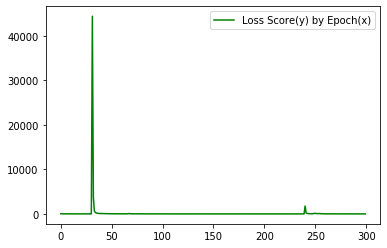

In [40]:
plt.plot(Seq_Model.history['loss'], color='green', label='Loss Score(y) by Epoch(x)')
# , marker ='o', linestyle='dashed',
plt.legend()

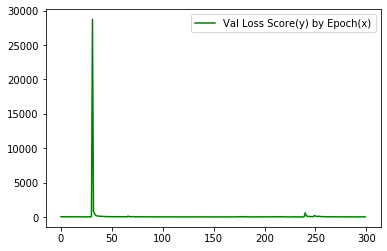

In [41]:
plt.plot(Seq_Model.history['val_loss'], color='green', label='Val Loss Score(y) by Epoch(x)')
# , marker ='o', linestyle='dashed',
plt.legend()

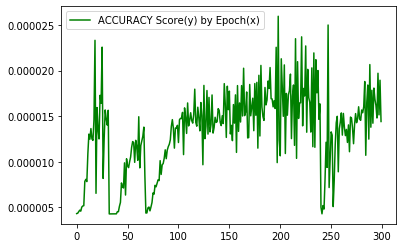

In [42]:
plt.plot(Seq_Model.history['accuracy'],  color='green', label='ACCURACY Score(y) by Epoch(x)')
plt.legend()

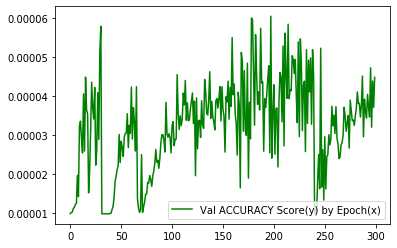

In [43]:
plt.plot(Seq_Model.history['val_accuracy'],  color='green', label='Val ACCURACY Score(y) by Epoch(x)')
plt.legend()

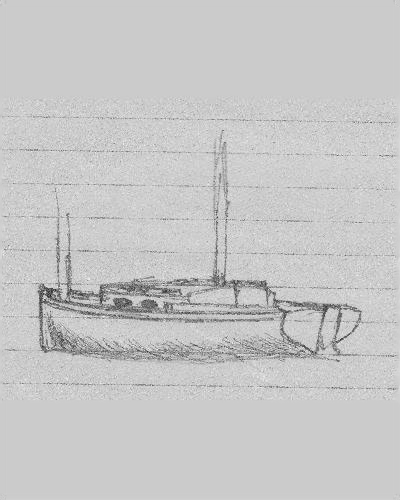

In [44]:
# See how it predicts on unseen image
result = model.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result) 


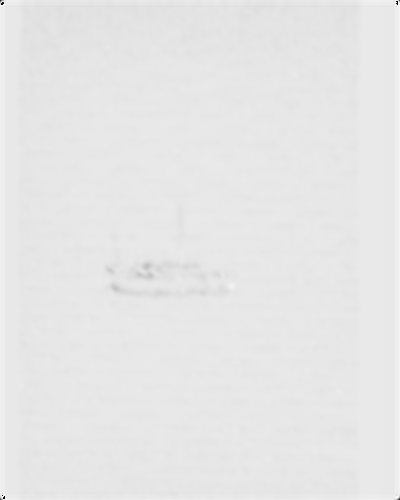

In [34]:
# result = model.predict(np.array([X]))
result = Seq_Model.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
#!tensorboard --logdir=logs


In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
